## **Hodgkin Huxley Model of Neuron**

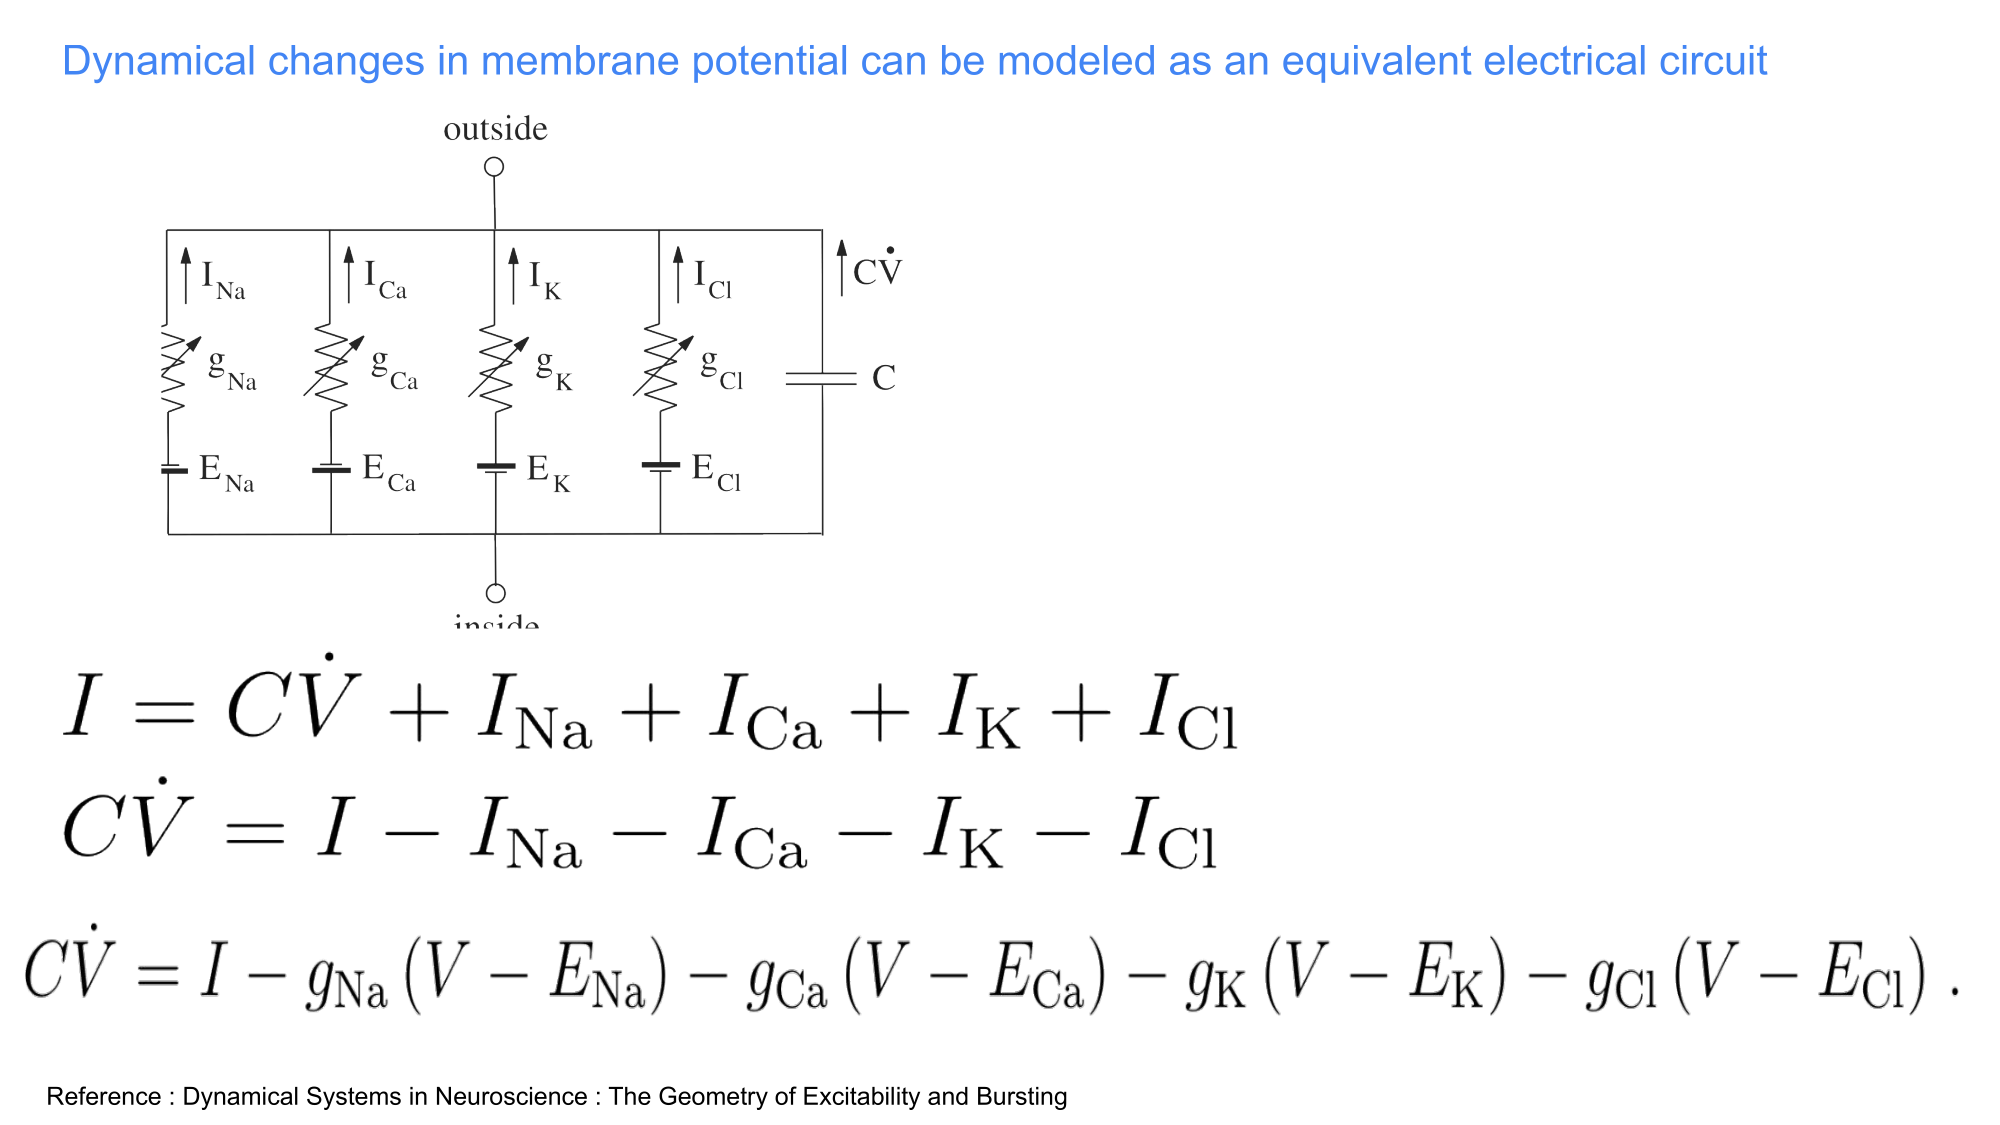

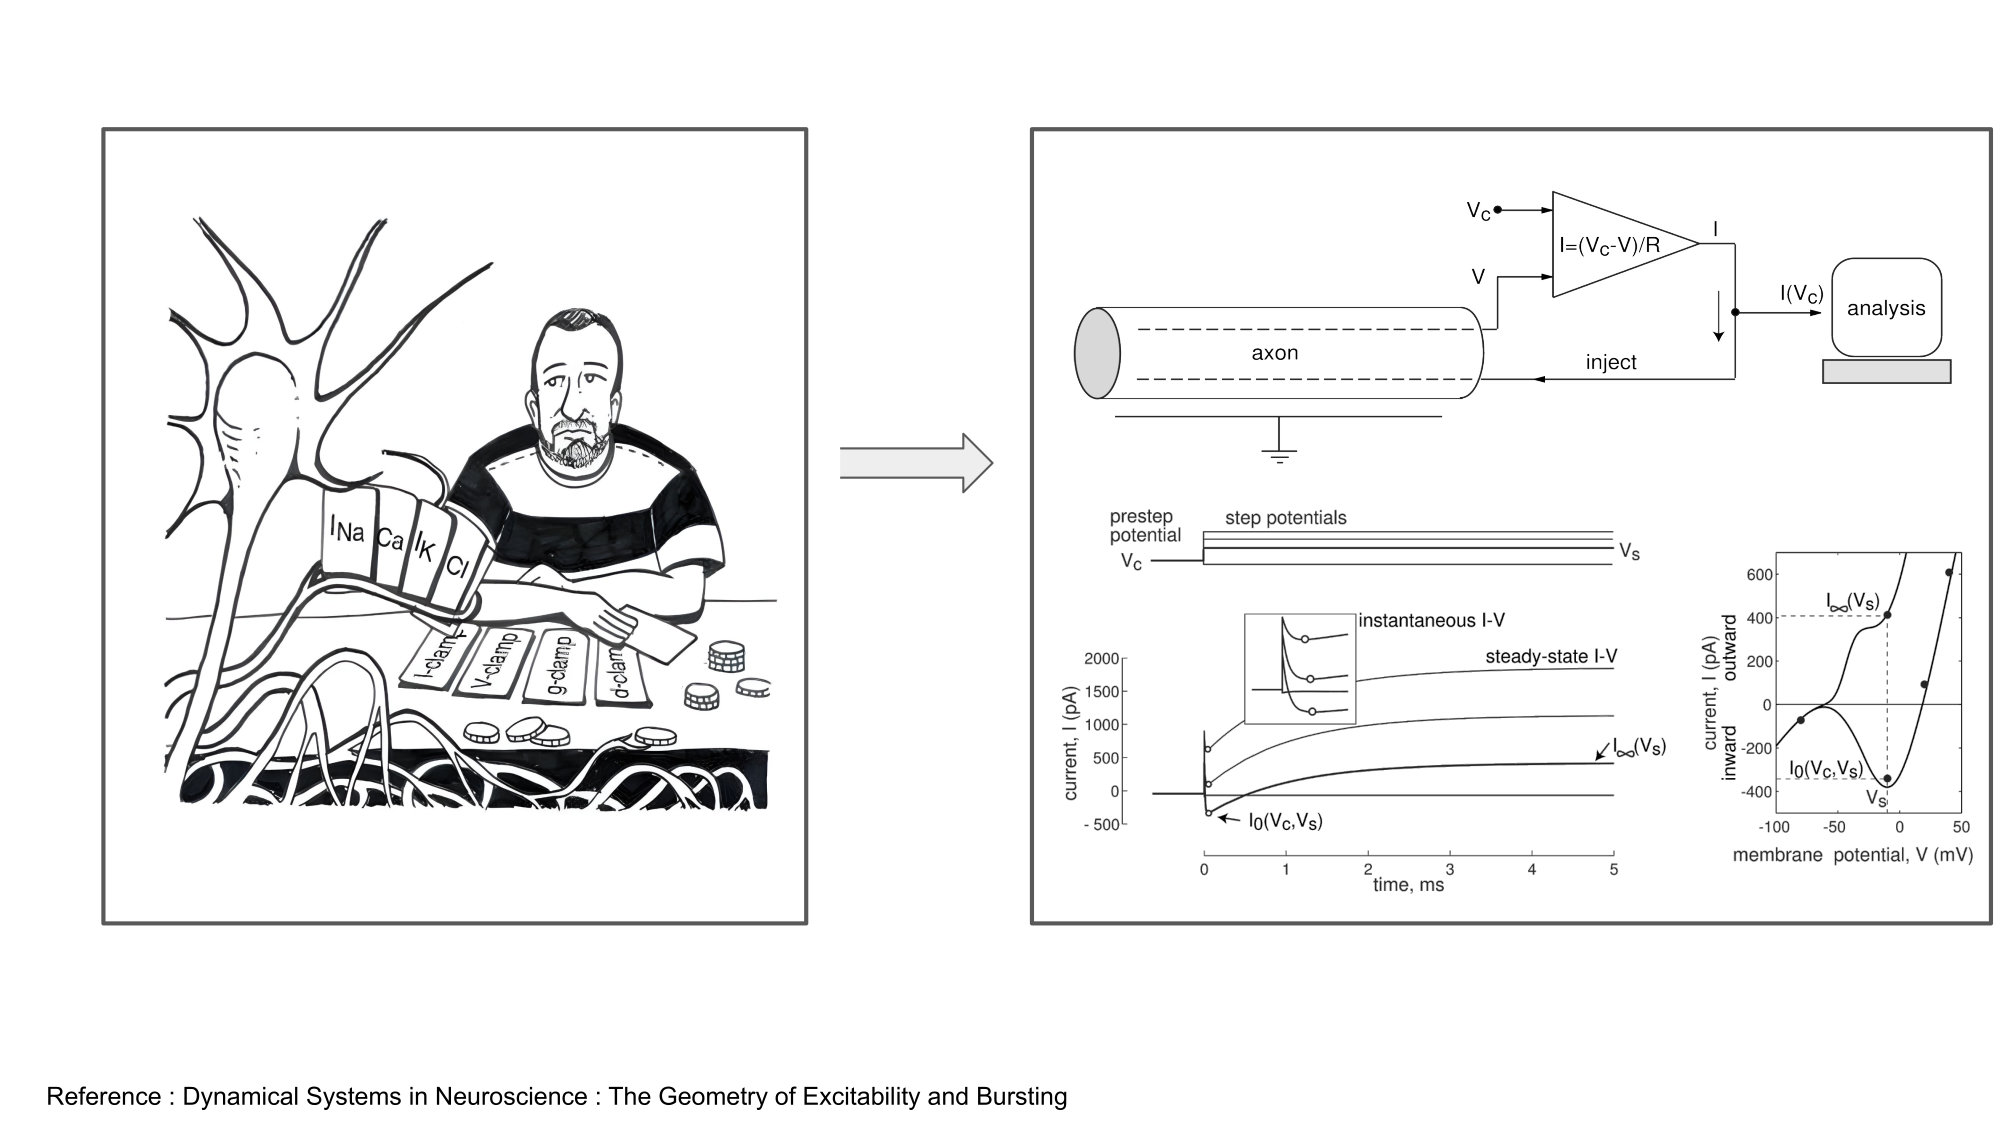

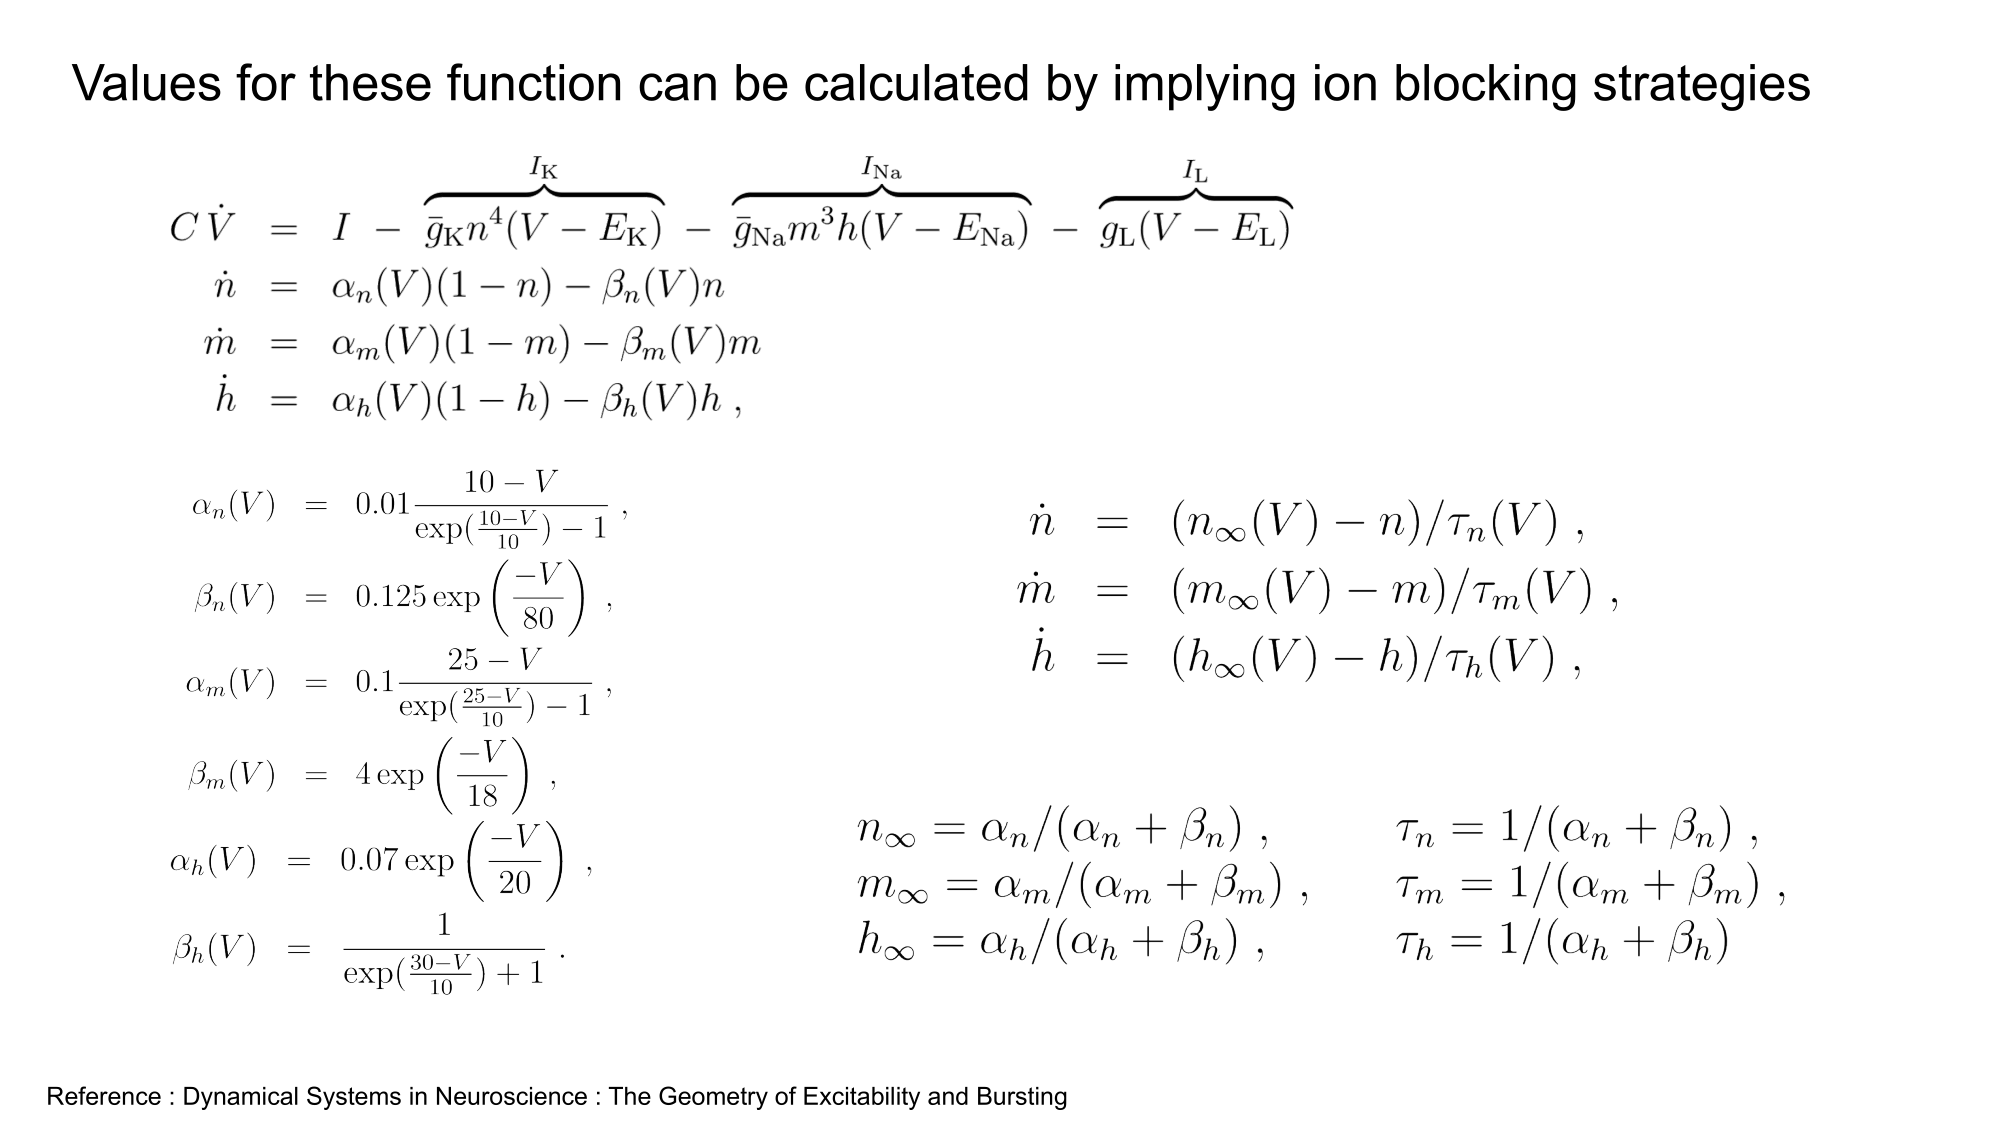

### Imports we need

In [ ]:
import os



#ignore if locally
#use this block for google colab.
# note : you have to make a folder named 'map_based'and map_based/images in your google drive
"""from google.colab import drive

WORK_DRIVE = '/gdrive'
images_dir = '/gdrive/My Drive/map_based/images'
WORK_AREA = WORK_DRIVE + '/MyDrive/map_based'

drive.mount(WORK_DRIVE)

os.chdir(WORK_AREA) """

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
from matplotlib.pyplot import cm
from numpy import size
import imageio
from IPython.display import clear_output


from IPython.display import clear_output
import glob
from IPython.display import Image
import imageio
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display

## Define gating variables and taus

In [ ]:
def alpha_m(V):
    return 0.1*(V+40.0)/(1.0 - np.exp(-(V+40.0) / 10.0))

def beta_m(V):
    return 4.0*np.exp(-(V+65.0) / 18.0)

def alpha_h(V):
    return 0.07*np.exp(-(V+65.0) / 20.0)

def beta_h(V):
    return 1.0/(1.0 + np.exp(-(V+35.0) / 10.0))

def alpha_n(V):
    return 0.01*(V+55.0)/(1.0 - np.exp(-(V+55.0) / 10.0))

def beta_n(V):
    return 0.125*np.exp(-(V+65) / 80.0)


def tau_m(V):
    return 1/(alpha_m(V)+beta_m(V))
    
def m_inf(V):
    return alpha_m(V)/(alpha_m(V)+beta_m(V))

def tau_n(V):
    return 1/(alpha_n(V)+beta_n(V))
    
def n_inf(V):
    return alpha_n(V)/(alpha_n(V)+beta_n(V))

def tau_h(V):
    return 1/(alpha_h(V)+beta_h(V))
    
def h_inf(V):
    return alpha_h(V)/(alpha_h(V)+beta_h(V))




def I_Na(V, m, h):
    """
    Membrane current (in uA/cm^2)

    |  :param V:
    |  :param m:
    |  :param h:
    |  :return:
    """
    return g_Na * m**3 * h * (V - E_Na)

def I_K(V, n):
    """
    Membrane current (in uA/cm^2)

    |  :param V:
    |  :param h:
    |  :return:
    """
    return g_K  * n**4 * (V - E_K)
#  Leak
def I_L(V):
    """
    Membrane current (in uA/cm^2)

    |  :param V:
    |  :param h:
    |  :return:
    """
    return g_L * (V - E_L)

def I_inj(t):
    """
    External Current

    |  :param t: time
    |  :return: step up to 10 uA/cm^2 at t>100
    |           step down to 0 uA/cm^2 at t>200
    |           step up to 35 uA/cm^2 at t>300
    |           step down to 0 uA/cm^2 at t>400
    """
    return  10*(t>100) - 10*(t>200) + 35*(t>300) - 35*(t>400)


def dALLdt(X, t):
    """
    Integrate

    |  :param X:
    |  :param t:
    |  :return: calculate membrane potential & activation variables
    """
    V, m, h, n = X

    dVdt = ( I_inj(t) - I_Na(V, m, h) - I_K(V, n) - I_L(V) ) / C_m
    dmdt = alpha_m(V)*(1.0-m) - beta_m(V)*m
    dhdt = alpha_h(V)*(1.0-h) - beta_h(V)*h
    dndt = alpha_n(V)*(1.0-n) - beta_n(V)*n
    return np.array([dVdt, dmdt, dhdt, dndt])
        
def euler(X,t):
    for i in range(1,t.shape[0]):
        X[i,:] = epsilon*dALLdt(X[i-1,:],t[i-1])+X[i-1,:] # Euler Integration Step
    return X





In [ ]:
#Model Parameters
C_m  =   1.0
g_Na = 120.0
g_K  =  36.0
g_L  =   0.3
E_Na =  50.0
E_K  = -77.0
E_L  = -54.387

#Simulation Paramaters
epsilon = 0.01
sim_dur = 450.0
t = np.arange(0.0, sim_dur, epsilon)
X = np.zeros((len(t),4))
X[0,0]=-65 #intial V



#Run Simulation
X = euler(X,t)

In [ ]:
#Plot

V = X[:,0]
m = X[:,1]
h = X[:,2]
n = X[:,3]
ina = I_Na(V, m, h)
ik = I_K(V, n)
il = I_L(V)

fig,axs = plt.subplots(4,1,figsize=(30,15) , dpi = 120)

axs[0].set_title('Hodgkin-Huxley Neuron')
axs[0].plot(t, V)
axs[0].set_ylabel('V (mV)')


axs[1].plot(t, ina, 'c', label='$I_{Na}$')
axs[1].plot(t, ik, 'y', label='$I_{K}$')
axs[1].plot(t, il, 'm', label='$I_{L}$')
axs[1].set_ylabel('Current')
axs[1].legend()

axs[2].plot(t, m, 'r', label='m')
axs[2].plot(t, h, 'g', label='h')
axs[2].plot(t, n, 'b', label='n')
axs[2].set_ylabel('Gating Value')
axs[2].legend()


i_inj_values = [I_inj(t) for t in t]
axs[3].plot(t, i_inj_values, 'k')
axs[3].set_xlabel('t (ms)')
axs[3].set_ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
axs[3].set_ylim(-1, 40)
clear_output(wait=False)
plt.show()

In [ ]:
fig,axs = plt.subplots(2,1,figsize=(8,8), dpi = 120)
V = np.linspace(-150,50,1000)
axs[0].plot(V,tau_m(V),label='tau_m')
axs[0].plot(V,tau_n(V),label='tau_n')
axs[0].plot(V,tau_h(V),label='tau_n')
axs[0].set(title='tau_x',ylabel='tau_x(V) (ms)')
axs[0].legend()

axs[1].plot(V,m_inf(V),label='m_inf')
axs[1].plot(V,n_inf(V),label='n_inf')
axs[1].plot(V,h_inf(V),label='h_inf')
axs[1].legend()
axs[1].set(title='x_inf',ylabel='x_inf(V)',xlabel='V (mV)')
clear_output(wait=False)
plt.show()

## **After hyperpolarization potential**

In [ ]:
# making a negative current
def I_inj2(t):
  if t > 0 and t < 200 :
    I = -4

  elif t > 350 and t < 400 :
    I = -12

  else :
    I = 0


  return  I


In [ ]:
#@title Everything else remains the same


def dALLdt(X, t):
    """
    Integrate

    |  :param X:
    |  :param t:
    |  :return: calculate membrane potential & activation variables
    """
    V, m, h, n = X

    dVdt = ( I_inj2(t) - I_Na(V, m, h) - I_K(V, n) - I_L(V) ) / C_m
    dmdt = alpha_m(V)*(1.0-m) - beta_m(V)*m
    dhdt = alpha_h(V)*(1.0-h) - beta_h(V)*h
    dndt = alpha_n(V)*(1.0-n) - beta_n(V)*n
    return np.array([dVdt, dmdt, dhdt, dndt])
        
def euler(X,t):
    for i in range(1,t.shape[0]):
        X[i,:] = epsilon*dALLdt(X[i-1,:],t[i-1])+X[i-1,:] # Euler Integration Step
    return X

#Model Parameters
C_m  =   1.0
g_Na = 120.0
g_K  =  36.0
g_L  =   0.3
E_Na =  50.0
E_K  = -77.0
E_L  = -54.387

#Simulation Paramaters
epsilon = 0.01
sim_dur = 450.0
t = np.arange(0.0, sim_dur, epsilon)
X = np.zeros((len(t),4))
X[0,0]=-65 #intial V



#Run Simulation
X = euler(X,t)

#Plot

V = X[:,0]
m = X[:,1]
h = X[:,2]
n = X[:,3]
ina = I_Na(V, m, h)
ik = I_K(V, n)
il = I_L(V)

fig,axs = plt.subplots(4,1,figsize=(30,15) , dpi = 120)

axs[0].set_title('Hodgkin-Huxley Neuron')
axs[0].plot(t, V)
axs[0].set_ylabel('V (mV)')
axs[0].set_xlim(0,)


axs[1].plot(t, ina, 'c', label='$I_{Na}$')
axs[1].plot(t, ik, 'y', label='$I_{K}$')
axs[1].plot(t, il, 'm', label='$I_{L}$')
axs[1].set_ylabel('Ionic Current')
axs[1].set_xlim(0,)
axs[1].legend()

axs[2].plot(t, m, 'r', label='m')
axs[2].plot(t, h, 'g', label='h')
axs[2].plot(t, n, 'b', label='n')
axs[2].set_ylabel('Gating Value')
axs[2].set_xlim(0,)
axs[2].legend()


i_inj_values = [I_inj2(t) for t in t]
axs[3].plot(t, i_inj_values, 'k-')
axs[3].set_xlabel('t (ms)')
axs[3].set_ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
axs[3].set_xlim(0,)
clear_output(wait=False)
plt.show()

### Threshold Effects
(pictures taken from neuronal dynamics online chapter 4.1)

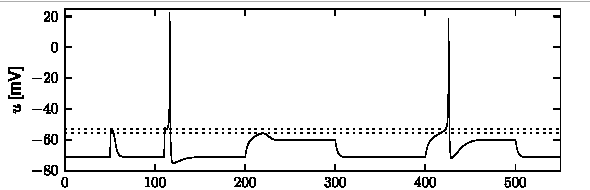

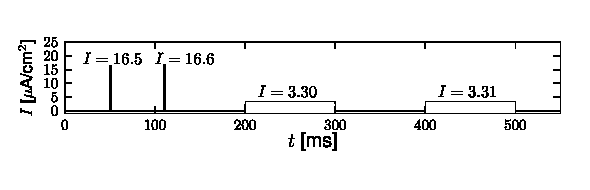

In [ ]:
# making a delta current

def I_inj3(t):
  if t > 50 and t < 50 + epsilon*5 :
    I = 160

  elif t > 100 and t < 100 + epsilon*5 :
    I = 165

  elif t > 250 and t < 300 :
    I = 2.23

  elif t > 350 and t < 400 :
    I = 2.24
  else :
    I = 0

  return  I

In [ ]:
#@title Everything else remains the same


def dALLdt(X, t):
    """
    Integrate

    |  :param X:
    |  :param t:
    |  :return: calculate membrane potential & activation variables
    """
    V, m, h, n = X

    dVdt = ( I_inj3(t) - I_Na(V, m, h) - I_K(V, n) - I_L(V) ) / C_m
    dmdt = alpha_m(V)*(1.0-m) - beta_m(V)*m
    dhdt = alpha_h(V)*(1.0-h) - beta_h(V)*h
    dndt = alpha_n(V)*(1.0-n) - beta_n(V)*n
    return np.array([dVdt, dmdt, dhdt, dndt])
        
def euler(X,t):
    for i in range(1,t.shape[0]):
        X[i,:] = epsilon*dALLdt(X[i-1,:],t[i-1])+X[i-1,:] # Euler Integration Step
    return X

#Model Parameters
C_m  =   1.0
g_Na = 120.0
g_K  =  36.0
g_L  =   0.3
E_Na =  50.0
E_K  = -77.0
E_L  = -54.387

#Simulation Paramaters
epsilon = 0.01
sim_dur = 450.0
t = np.arange(0.0, sim_dur, epsilon)
X = np.zeros((len(t),4))
X[0,0]=-65 #intial V



#Run Simulation
X = euler(X,t)

#Plot

V = X[:,0]
m = X[:,1]
h = X[:,2]
n = X[:,3]
ina = I_Na(V, m, h)
ik = I_K(V, n)
il = I_L(V)

fig,axs = plt.subplots(4,1,figsize=(30,15) , dpi = 120)

axs[0].set_title('Hodgkin-Huxley Neuron')
axs[0].plot(t, V)
axs[0].set_ylabel('V (mV)')
axs[0].set_xlim(0,)


axs[1].plot(t, ina, 'c', label='$I_{Na}$')
axs[1].plot(t, ik, 'y', label='$I_{K}$')
axs[1].plot(t, il, 'm', label='$I_{L}$')
axs[1].set_ylabel('Ionic Current')
axs[1].set_xlim(0,)
axs[1].legend()

axs[2].plot(t, m, 'r', label='m')
axs[2].plot(t, h, 'g', label='h')
axs[2].plot(t, n, 'b', label='n')
axs[2].set_ylabel('Gating Value')
axs[2].set_xlim(0,)
axs[2].legend()


i_inj_values = [I_inj3(t) for t in t]
axs[3].plot(t, i_inj_values, 'k-')
axs[3].set_xlabel('t (ms)')
axs[3].set_ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
axs[3].set_xlim(0,)
clear_output(wait=False)
plt.show()

In [ ]:
# constant DC 
#@title Limit cycles in hodgkin huxley

inj_list = np.linspace(-25,200,200)

idx = 0
for i in inj_list :
  idx = idx + 1 
  Inj = i

  def dALLdt(X, t):
      """
      Integrate

      |  :param X:
      |  :param t:
      |  :return: calculate membrane potential & activation variables
      """
      V, m, h, n = X

      dVdt = ( Inj - I_Na(V, m, h) - I_K(V, n) - I_L(V) ) / C_m
      dmdt = alpha_m(V)*(1.0-m) - beta_m(V)*m
      dhdt = alpha_h(V)*(1.0-h) - beta_h(V)*h
      dndt = alpha_n(V)*(1.0-n) - beta_n(V)*n
      return np.array([dVdt, dmdt, dhdt, dndt])
          
  def euler(X,t):
      for i in range(1,t.shape[0]):
          X[i,:] = epsilon*dALLdt(X[i-1,:],t[i-1])+X[i-1,:] # Euler Integration Step
      return X

  #Model Parameters
  C_m  =   1.0
  g_Na = 120.0
  g_K  =  36.0
  g_L  =   0.3
  E_Na =  50.0
  E_K  = -77.0
  E_L  = -54.387

  #Simulation Paramaters
  epsilon = 0.01
  sim_dur = 450.0
  t = np.arange(0.0, sim_dur, epsilon)
  X = np.zeros((len(t),4))
  X[0,0]=-65 #intial V



  #Run Simulation
  X = euler(X,t)

  #Plot

  V = X[:,0]
  m = X[:,1]
  h = X[:,2]
  n = X[:,3]
  ina = I_Na(V, m, h)
  ik = I_K(V, n)
  il = I_L(V)
  # effect of injected current on gating variable 

  figure(num=None, figsize=(5, 5), dpi=120, facecolor='w', edgecolor='k')
  plt.plot(V,m,'r-',linewidth=1,label='m vs V')
  plt.plot(V,n,'g-',linewidth=1,label='n vs V')
  plt.plot(V,h,'b-',linewidth=1,label='h vs V')
  plt.xlim(-100,100)
  plt.ylim(0,1)
  plt.xlabel('V')
  plt.ylabel('m')
  plt.title("Injected Current (in uA/cm2):  " + str(np.round(Inj,3)))
  plt.legend()
  plt.savefig(str(idx) + '.png')
  plt.close('all')
  clear_output(wait=False)


with imageio.get_writer('movie3_limit.gif', mode='I' , duration = 0.20) as writer:
    for i in range(1,np.shape(inj_list)[0]+1):
        filename = str(i) + '.png'
        image = imageio.imread(filename)
        os.remove(filename)
        writer.append_data(image)


with open("movie3_limit.gif",'rb') as f:
    display.Image(data=f.read(), format='png'  )



In [ ]:
# constant DC 
#@title Limit cycles in hodgkin huxley - 2 (along with Voltages)

inj_list = np.linspace(-25,200,200)

idx = 0
for i in inj_list :
  idx = idx + 1 
  Inj = i

  def dALLdt(X, t):
      """
      Integrate

      |  :param X:
      |  :param t:
      |  :return: calculate membrane potential & activation variables
      """
      V, m, h, n = X

      dVdt = ( Inj - I_Na(V, m, h) - I_K(V, n) - I_L(V) ) / C_m
      dmdt = alpha_m(V)*(1.0-m) - beta_m(V)*m
      dhdt = alpha_h(V)*(1.0-h) - beta_h(V)*h
      dndt = alpha_n(V)*(1.0-n) - beta_n(V)*n
      return np.array([dVdt, dmdt, dhdt, dndt])
          
  def euler(X,t):
      for i in range(1,t.shape[0]):
          X[i,:] = epsilon*dALLdt(X[i-1,:],t[i-1])+X[i-1,:] # Euler Integration Step
      return X

  #Model Parameters
  C_m  =   1.0
  g_Na = 120.0
  g_K  =  36.0
  g_L  =   0.3
  E_Na =  50.0
  E_K  = -77.0
  E_L  = -54.387

  #Simulation Paramaters
  epsilon = 0.01
  sim_dur = 450.0
  t = np.arange(0.0, sim_dur, epsilon)
  X = np.zeros((len(t),4))
  X[0,0]=-65 #intial V



  #Run Simulation
  X = euler(X,t)

  #Plot

  V = X[:,0]
  m = X[:,1]
  h = X[:,2]
  n = X[:,3]
  ina = I_Na(V, m, h)
  ik = I_K(V, n)
  il = I_L(V)
  # effect of injected current on gating variable 
  fig,axs = plt.subplots(2,1,figsize=(7,7) , dpi = 120)


  axs[0].set_title("Injected Current (in uA/cm2):  " + str(np.round(Inj,3)) )
  axs[0].plot(V,m,'r-',linewidth=1,label='m vs V')
  axs[0].plot(V,n,'g-',linewidth=1,label='n vs V')
  axs[0].plot(V,h,'b-',linewidth=1,label='h vs V')
  axs[0].set_ylabel('gating variables')
  axs[0].set_xlim(-100,100)
  axs[0].set_ylim(0,1)
  axs[0].legend()


  
  axs[1].plot(t, V)
  axs[1].set_ylabel('V (mV)')
  axs[1].set_ylim(-100,50)
  axs[1].set_xlim(0,)



  plt.savefig(str(idx) + '.png')
  plt.close('all')
  clear_output(wait=False)


with imageio.get_writer('movie3_limit2.gif', mode='I' , duration = 0.20) as writer:
    for i in range(1,np.shape(inj_list)[0]+1):
        filename = str(i) + '.png'
        image = imageio.imread(filename)
        os.remove(filename)
        writer.append_data(image)


with open("movie3_limit2.gif",'rb') as f:
    display.Image(data=f.read(), format='png'  )



In [ ]:
# constant DC 
#@title Limit cycles in hodgkin huxley - 2 (along with Voltages) (reversed)

inj_list = (np.linspace(-25,200,200))

idx = 0
for i in reversed(inj_list) :
  idx = idx + 1 
  Inj = i

  def dALLdt(X, t):
      """
      Integrate

      |  :param X:
      |  :param t:
      |  :return: calculate membrane potential & activation variables
      """
      V, m, h, n = X

      dVdt = ( Inj - I_Na(V, m, h) - I_K(V, n) - I_L(V) ) / C_m
      dmdt = alpha_m(V)*(1.0-m) - beta_m(V)*m
      dhdt = alpha_h(V)*(1.0-h) - beta_h(V)*h
      dndt = alpha_n(V)*(1.0-n) - beta_n(V)*n
      return np.array([dVdt, dmdt, dhdt, dndt])
          
  def euler(X,t):
      for i in range(1,t.shape[0]):
          X[i,:] = epsilon*dALLdt(X[i-1,:],t[i-1])+X[i-1,:] # Euler Integration Step
      return X

  #Model Parameters
  C_m  =   1.0
  g_Na = 120.0
  g_K  =  36.0
  g_L  =   0.3
  E_Na =  50.0
  E_K  = -77.0
  E_L  = -54.387

  #Simulation Paramaters
  epsilon = 0.01
  sim_dur = 450.0
  t = np.arange(0.0, sim_dur, epsilon)
  X = np.zeros((len(t),4))
  X[0,0]=-65 #intial V



  #Run Simulation
  X = euler(X,t)

  #Plot

  V = X[:,0]
  m = X[:,1]
  h = X[:,2]
  n = X[:,3]
  ina = I_Na(V, m, h)
  ik = I_K(V, n)
  il = I_L(V)
  # effect of injected current on gating variable 
  fig,axs = plt.subplots(2,1,figsize=(7,7) , dpi = 120)


  axs[0].set_title("Injected Current (in uA/cm2):  " + str(np.round(Inj,3)) )
  axs[0].plot(V,m,'r-',linewidth=1,label='m vs V')
  axs[0].plot(V,n,'g-',linewidth=1,label='n vs V')
  axs[0].plot(V,h,'b-',linewidth=1,label='h vs V')
  axs[0].set_ylabel('gating variables')
  axs[0].set_xlim(-100,100)
  axs[0].set_ylim(0,1)
  axs[0].legend()


  
  axs[1].plot(t, V)
  axs[1].set_ylabel('V (mV)')
  axs[1].set_ylim(-100,50)
  axs[1].set_xlim(0,)



  plt.savefig(str(idx) + '.png')
  plt.close('all')
  clear_output(wait=False)


with imageio.get_writer('movie3_limit3.gif', mode='I' , duration = 0.20) as writer:
    for i in range(1,np.shape(inj_list)[0]+1):
        filename = str(i) + '.png'
        image = imageio.imread(filename)
        os.remove(filename)
        writer.append_data(image)


with open("movie3_limit3.gif",'rb') as f:
    display.Image(data=f.read(), format='png'  )

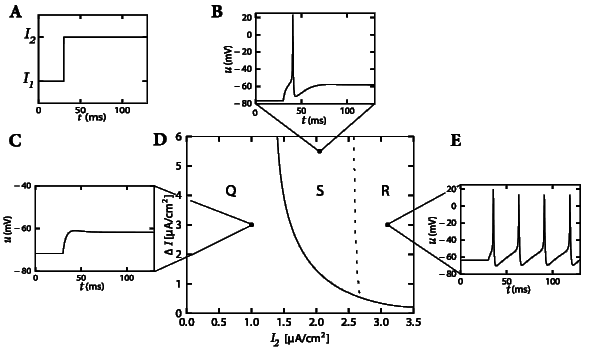

### Define a jump Current 

In [ ]:
def Ijump(dI,I2,t) :
  if t< 100 :
    I = I2 - dI 
  else :
    I = I2

  return I

#define a spike counter : 
def spike_counter (t,V,th) :
    V = np.array(V)
    t = np.array(t)
    ind1 = []
    for i in range(np.shape(V)[0] -1) :
        
        if ((V[i] - th) <= 0.0  and (V[i+1] - th) > 0.0 ) :
            ind1.append(i)
    arr = t[ind1]
    
    return arr

In [ ]:
dI = 10
I2 = 2.20

In [ ]:
#@title Everything else remains the same


def dALLdt(X, t):
    """
    Integrate

    |  :param X:
    |  :param t:
    |  :return: calculate membrane potential & activation variables
    """
    V, m, h, n = X

    dVdt = ( Ijump(dI, I2, t) - I_Na(V, m, h) - I_K(V, n) - I_L(V) ) / C_m
    dmdt = alpha_m(V)*(1.0-m) - beta_m(V)*m
    dhdt = alpha_h(V)*(1.0-h) - beta_h(V)*h
    dndt = alpha_n(V)*(1.0-n) - beta_n(V)*n
    return np.array([dVdt, dmdt, dhdt, dndt])
        
def euler(X,t):
    for i in range(1,t.shape[0]):
        X[i,:] = epsilon*dALLdt(X[i-1,:],t[i-1])+X[i-1,:] # Euler Integration Step
    return X

#Model Parameters
C_m  =   1.0
g_Na = 120.0
g_K  =  36.0
g_L  =   0.3
E_Na =  50.0
E_K  = -77.0
E_L  = -54.387

#Simulation Paramaters
epsilon = 0.01
sim_dur = 450.0
t = np.arange(0.0, sim_dur, epsilon)
X = np.zeros((len(t),4))
X[0,0]=-65 #intial V



#Run Simulation
X = euler(X,t)

#Plot

V = X[:,0]
m = X[:,1]
h = X[:,2]
n = X[:,3]
ina = I_Na(V, m, h)
ik = I_K(V, n)
il = I_L(V)

fig,axs = plt.subplots(4,1,figsize=(30,15) , dpi = 120)

axs[0].set_title('Hodgkin-Huxley Neuron')
axs[0].plot(t, V)
axs[0].set_ylabel('V (mV)')
axs[0].set_xlim(0,)


axs[1].plot(t, ina, 'c', label='$I_{Na}$')
axs[1].plot(t, ik, 'y', label='$I_{K}$')
axs[1].plot(t, il, 'm', label='$I_{L}$')
axs[1].set_ylabel('Ionic Current')
axs[1].set_xlim(0,)
axs[1].legend()

axs[2].plot(t, m, 'r', label='m')
axs[2].plot(t, h, 'g', label='h')
axs[2].plot(t, n, 'b', label='n')
axs[2].set_ylabel('Gating Value')
axs[2].set_xlim(0,)
axs[2].legend()


i_inj_values = [Ijump(dI, I2, t) for t in t]
axs[3].plot(t, i_inj_values, 'k-')
axs[3].set_xlabel('t (ms)')
axs[3].set_ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
axs[3].set_xlim(0,)
clear_output(wait=False)
plt.show()

In [ ]:
I2_list = np.arange(0,10,0.25)
dI_list = np.arange(0,10,0.25)

empty_array = np.empty((0,3), float)
idx = 0
for I2 in I2_list :
  for dI in dI_list:
    idx = idx + 1
    print("completed = " + str(np.round(100*idx/(len(I2_list)*len(dI_list)),3)) , end='\r')
    #@title Everything else remains the same


    def dALLdt(X, t):
        """
        Integrate

        |  :param X:
        |  :param t:
        |  :return: calculate membrane potential & activation variables
        """
        V, m, h, n = X

        dVdt = ( Ijump(dI, I2, t) - I_Na(V, m, h) - I_K(V, n) - I_L(V) ) / C_m
        dmdt = alpha_m(V)*(1.0-m) - beta_m(V)*m
        dhdt = alpha_h(V)*(1.0-h) - beta_h(V)*h
        dndt = alpha_n(V)*(1.0-n) - beta_n(V)*n
        return np.array([dVdt, dmdt, dhdt, dndt])
            
    def euler(X,t):
        for i in range(1,t.shape[0]):
            X[i,:] = epsilon*dALLdt(X[i-1,:],t[i-1])+X[i-1,:] # Euler Integration Step
        return X

    #Model Parameters
    C_m  =   1.0
    g_Na = 120.0
    g_K  =  36.0
    g_L  =   0.3
    E_Na =  50.0
    E_K  = -77.0
    E_L  = -54.387

    #Simulation Paramaters
    epsilon = 0.01
    sim_dur = 450.0
    t = np.arange(0.0, sim_dur, epsilon)
    X = np.zeros((len(t),4))
    X[0,0]=-65 #intial V



    #Run Simulation
    X = euler(X,t)

    #Plot

    V = X[:,0]

    spk = spike_counter(t,V,-20)
    #spk = np.argwhere(spk > 90)
    spk = spk[(np.argwhere(spk > 40))]
    if len(spk) == 0 :
      empty_array = np.append(empty_array, np.array([[I2,dI,0]]), axis=0)

    elif len(spk) == 1 :
      empty_array = np.append(empty_array, np.array([[I2,dI,1]]), axis=0)

    else :
      empty_array = np.append(empty_array, np.array([[I2,dI,2]]), axis=0)

    


In [ ]:
figure(num=None, figsize=(5, 5), dpi=120, facecolor='w', edgecolor='k')

for k in range(np.shape(empty_array)[0]):
  if empty_array[k,2] == 0 :
    plt.plot(empty_array[k,0] , empty_array[k,1] , "bo")
    clear_output(wait=False)
  elif empty_array[k,2] == 1 :
    plt.plot(empty_array[k,0] , empty_array[k,1] , "go")
    clear_output(wait=False)
  elif empty_array[k,2] == 2 :
    plt.plot(empty_array[k,0] , empty_array[k,1] , "ro")
    clear_output(wait=False)
  
plt.show()